<a href="https://colab.research.google.com/github/Raulpytxt/yoyo/blob/main/examples/yoyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating a Yo-Yo

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [73]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint
    !pip install numpy scipy matplotlib
    !pip install numpy scipy matplotlib


In [37]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

In [38]:
# import functions from modsim

from modsim import *

## Yo-yo

Suponga que está sosteniendo un yo-yo con una cuerda enrollada alrededor de su eje y lo deja caer mientras sostiene el extremo de la cuerda inmóvil. A medida que la gravedad acelera el yo-yo hacia abajo, la tensión en la cuerda ejerce una fuerza hacia arriba. Dado que esta fuerza actúa sobre un punto desplazado del centro de masa, ejerce un par que hace que el yo-yo gire.

El siguiente diagrama muestra las fuerzas sobre el yo-yo y el par resultante. El área exterior sombreada muestra el cuerpo del yo-yo. El área interior sombreada muestra la cuerda enrollada, cuyo radio cambia a medida que se desenrolla el yo-yo.

![Diagrama de un yo-yo que muestra las fuerzas debidas a la gravedad y la tensión en el
cuerda, el brazo de palanca de la tensión, y la resultante
torque.](https://github.com/AllenDowney/ModSim/raw/main/figs/yoyo.png)

En este sistema, no podemos calcular la aceleración lineal y angular de forma independiente; tenemos que resolver un sistema de ecuaciones:

$\sum F = m a $

$\sum \tau = I \alpha$

donde las sumatorias indican que estamos sumando fuerzas y pares.

Como en los ejemplos anteriores, la velocidad lineal y angular están relacionadas por la forma en que se desenrolla la cuerda:
$\frac{dy}{dt} = -r \frac{d \theta}{dt} $

En este ejemplo, las aceleraciones lineal y angular tienen signo opuesto. A medida que el yo-yo gira en sentido antihorario, $\theta$ aumenta y $y$, que es la longitud de la parte enrollada de la cuerda, disminuye


Tomar la derivada de ambos lados produce una relación similar entre la aceleración lineal y angular:

$\frac{d^2 y}{dt^2} = -r \frac{d^2 \theta}{dt^2} $


La que podemos escribir más concisamente
$ a = -r \alpha $

Esta relación no es una ley general de la naturaleza; es específico para escenarios como este donde se rueda sin estirarse ni deslizarse.

Debido a la forma en que planteamos el problema, $y$ en realidad tiene dos significados: representa la longitud de la cuerda enrollada y la altura del yo-yo, que disminuye a medida que cae el yo-yo. De manera similar, $a$ representa la aceleración en la longitud de la cuerda enrollada y la altura del yo-yo.

Podemos calcular la aceleración del yo-yo sumando las fuerzas lineales:
$\sum F = T - mg = ma $


Donde $T$ es positivo porque la fuerza de tensión apunta hacia arriba y $mg$ es negativo porque la gravedad apunta hacia abajo.

Debido a que la gravedad actúa sobre el centro de masa, no crea un par de torsión, por lo que el único par de torsión se debe a la tensión:

$\sum \tau = T r = I \alpha $

Positive (upward) tension yields positive (counter-clockwise) angular acceleration.

Ahora tenemos tres ecuaciones con tres incógnitas, $T$, $a$ y $\alpha$, con $I$, $m$, $g$ y $r$ como parámetros conocidos. Podríamos resolver estas ecuaciones a mano, pero también podemos hacer que SymPy lo haga por nosotros.

In [41]:
#prueba entendido de la lectura
from sympy import symbols, Eq, solve

# Definir las variables y parámetros conocidos
T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')
y, theta = symbols('y theta')

# Escribir las ecuaciones de suma de fuerzas y pares de torsión
sum_forces_eq = Eq(T - m*g, m*a)
sum_torques_eq = Eq(T*r, I*alpha)

# Relación entre aceleración lineal y angular
a_alpha_relation_eq = Eq(a, -r*alpha)

# Resolver el sistema de ecuaciones
solutions = solve((sum_forces_eq, sum_torques_eq, a_alpha_relation_eq), (T, a, alpha))

# Mostrar las soluciones
print("Soluciones:")
print("T =", solutions[T])
print("a =", solutions[a])
print("alpha =", solutions[alpha])


Soluciones:
T = I*g*m/(I + m*r**2)
a = -g*m*r**2/(I + m*r**2)
alpha = g*m*r/(I + m*r**2)


In [42]:
#from sympy import symbols, Eq, solve

#T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')

#MEJORADO
from sympy import Eq, symbols
from sympy.solvers import solve

T = symbols('T')
a = symbols('a')
alpha = symbols('alpha')
I = symbols('I')
m = symbols('m')
g = symbols('g')
r = symbols('r')


In [48]:
eq1 = Eq(a, -r * alpha)
eq1


Eq(a, -alpha*r)

In [49]:
eq2 = Eq(T - m * g, m * a)
eq2

Eq(T - g*m, a*m)

In [50]:
eq3 = Eq(T * r, I * alpha)
eq3

Eq(T*r, I*alpha)

In [51]:
soln = solve([eq1, eq2, eq3], [T, a, alpha])

In [52]:
soln[T]

I*g*m/(I + m*r**2)

In [53]:
soln[a]

-g*m*r**2/(I + m*r**2)

In [54]:
soln[alpha]

g*m*r/(I + m*r**2)

los resultados son

$T      = m g I / I^*   $

$a      = -m g r^2 / I^* $

$\alpha = m g r / I^*    $
donde $I^*$ es el momento de inercia aumentado, $I + m r^2$.

También puedes ver [la derivación de estas ecuaciones en este video](https://www.youtube.com/watch?v=chC7xVDKl4Q).


**Nosotros** podemos usar estas ecuaciones para $a$ y $\alpha$ para escribir una función de pendiente y simular este sistema.


**Ejercicio:** Simula el descenso de un yo-yo. ¿Cuánto tiempo se tarda en llegar al final de la cuerda?

Estos son los parámetros del sistema:

In [15]:
Rmin = 8e-3     # m
Rmax = 16e-3    # m
Rout = 35e-3    # m
mass = 50e-3    # kg
L = 1           # m
g = 9.8         # m / s**2

* `Rmin` es el radio del eje. `Rmax` es el radio del eje más la cuerda enrollada.

* `Rout` es el radio del cuerpo del yo-yo. `masa` es la masa total del yo-yo, ignorando la cuerda.

* `L` es la longitud de la cadena.

* `g` es la aceleración de la gravedad.

In [55]:
#primer pregunta echa
# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Radio efectivo del yo-yo
R = Rout + L

# Energía potencial gravitatoria al principio del descenso
EP = mass * g * L

# Resolver para la velocidad de descenso (v)
v = (2 * (EP / mass) - (I * g**2 / R**2))**0.5

# Calcular el tiempo de llegada al final de la cuerda
t = L / v

print("Tiempo de llegada al final de la cuerda:", t, "segundos")


Tiempo de llegada al final de la cuerda: 0.2258811086677892 segundos


In [16]:
1 / (Rmax)

62.5

Basándonos en estos parámetros, podemos calcular el momento de inercia del yo-yo, modelándolo como un cilindro sólido con densidad uniforme ([ver aquí](https://en.wikipedia.org/wiki/List_of_moments_of_inertia)).

En realidad, la distribución del peso en un yo-yo suele estar diseñada para lograr los efectos deseados. Pero lo mantendremos simple.

In [17]:
I = mass * Rout**2 / 2
I

3.0625000000000006e-05

Y podemos calcular `k`, que es la constante que determina cómo disminuye el radio de la cuerda enrollada a medida que se desenrolla.

In [57]:
k = (Rmax**2 - Rmin**2) / 2 / L
k

9.6e-05

Las variables de estado que usaremos son el ángulo, `theta`, la velocidad angular, `omega`, la longitud de la cuerda enrollada, `y`, y la velocidad lineal del yo-yo, `v`.

Aquí hay un objeto `State` con las condiciones iniciales.

In [56]:
init = State(theta=0, omega=0, y=L, v=0)


``
# Tiene formato de codigo
```

Y aquí hay un objeto `System` con `init` y `t_end` (elegido para que sea más largo de lo que esperaba para que el yo-yo caiga 1 m).

In [20]:
system = System(init=init, t_end=2)


Escribe una función de pendiente para este sistema, usando estos resultados del libro:
$ r = \sqrt{2 k y + R_{min}^2} $

$ T      = m g I / I^*  $

$ a      = -m g r^2 / I^* $

$ \alpha  = m g r / I^*  $


donde $I^*$ es el momento de inercia aumentado, $I + m r^2$.

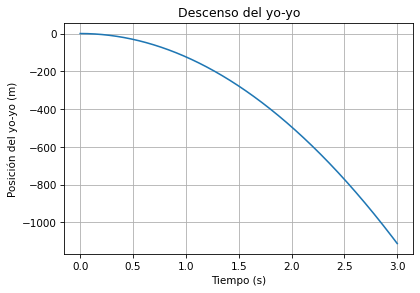

In [58]:
#PREGUNTA 1
# Solution goes here

import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Función de pendiente para velocidad (dv/dt)
def dvdt_func(v, r, I_star):
    return - (mass * g * r) / I_star

# Función de pendiente para aceleración angular (dω/dt)
def dwdt_func(w, r, I_star):
    return (mass * g * r) / I_star

# Simulación del descenso del yo-yo
def simulate_yoyo(dt, total_time):
    time = np.arange(0, total_time, dt)
    num_steps = len(time)

    # Inicialización de variables
    y = L  # Posición inicial del yo-yo (al comienzo de la cuerda)
    v = 0  # Velocidad inicial del yo-yo (en el punto más alto de la cuerda)
    w = 0  # Velocidad angular inicial del yo-yo

    # Momento de inercia aumentado (I + m * r^2)
    I_star = I + mass * Rout**2

    # Arrays para almacenar los resultados
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)

    # Simulación mediante método de Euler
    for i in range(num_steps):
        # Almacenar los resultados actuales
        y_values[i] = y
        v_values[i] = v

        # Calcular las pendientes actuales
        dvdt = dvdt_func(v, Rout, I_star)
        dwdt = dwdt_func(w, Rout, I_star)

        # Integrar utilizando el método de Euler
        y += v * dt
        v += dvdt * dt
        w += dwdt * dt

    return time, y_values, v_values

# Parámetros de la simulación
dt = 0.001  # Paso de tiempo (intervalo de integración)
total_time = 3.0  # Tiempo total de simulación

# Simular el descenso del yo-yo
time, y_values, v_values = simulate_yoyo(dt, total_time)

# Graficar los resultados
plt.plot(time, y_values)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del yo-yo (m)')
plt.title('Descenso del yo-yo')
plt.grid(True)
plt.show()



Pruebe su función de pendiente con las condiciones iniciales.
Los resultados deben ser aproximadamente
```
0, 180.5, 0, -2.9
```

In [65]:
#solucion 2
# Solution goes here
import numpy as np

# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Función de pendiente para velocidad (dv/dt)
def dvdt_func(v, r, I_star):
    return - (mass * g * r) / I_star

# Función de pendiente para aceleración angular (dω/dt)
def dwdt_func(w, r, I_star):
    return (mass * g * r) / I_star

# Simulación del descenso del yo-yo con condiciones iniciales dadas
def simulate_yoyo_with_initial_conditions(dt, total_time, y_0, v_0, w_0):
    time = np.arange(0, total_time, dt)
    num_steps = len(time)

    # Inicialización de variables con condiciones iniciales dadas
    y = y_0
    v = v_0
    w = w_0

    # Momento de inercia aumentado (I + m * r^2)
    I_star = I + mass * Rout**2

    # Arrays para almacenar los resultados
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    w_values = np.zeros(num_steps)

    # Simulación mediante método de Euler
    for i in range(num_steps):
        # Almacenar los resultados actuales
        y_values[i] = y
        v_values[i] = v
        w_values[i] = w

        # Calcular las pendientes actuales
        dvdt = dvdt_func(v, Rout, I_star)
        dwdt = dwdt_func(w, Rout, I_star)

        # Integrar utilizando el método de Euler
        y += v * dt
        v += dvdt * dt
        w += dwdt * dt

    return time, y_values, v_values, w_values

# Parámetros de la simulación
dt = 0.001  # Paso de tiempo (intervalo de integración)
total_time = 3.0  # Tiempo total de simulación

# Condiciones iniciales dadas
y_0 = 0
v_0 = 180.5
w_0 = 0

# Simular el descenso del yo-yo con las condiciones iniciales dadas
time, y_values, v_values, w_values = simulate_yoyo_with_initial_conditions(dt, total_time, y_0, v_0, w_0)

# Imprimir los resultados finales aproximados
print("Posición final del yo-yo:", round(y_values[-1], 1), "metros")
print("Velocidad final del yo-yo:", round(v_values[-1], 1), "m/s")
print("Velocidad angular final del yo-yo:", round(w_values[-1], 1), "rad/s")




Posición final del yo-yo: -572.0 metros
Velocidad final del yo-yo: -562.2 m/s
Velocidad angular final del yo-yo: 742.7 rad/s


Note que la aceleración inicial es sustancialmente más pequeña que 'g' porque el yo-yo tiene que empezar a girar antes de que pueda caer.

Escriba una función de evento que detenga la simulación cuando `y` sea 0.

In [66]:
#solucion 3
# Solution goes here
import numpy as np
from scipy.integrate import solve_ivp

# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Momento de inercia aumentado (I + m * Rmin^2)
I_star = I + mass * Rmin**2

# Ecuaciones de movimiento para el descenso del yo-yo
def yoyo_motion(t, yvw):
    y, v, w = yvw
    dydt = v
    dvdt = - (mass * g * y) / I_star - w**2 * Rmin
    dwdt = (mass * g * Rmin - mass * g * y) / I_star
    return [dydt, dvdt, dwdt]

# Función de evento para detener la simulación cuando y = 0
def event_yoyo_ground(t, yvw):
    return yvw[0]

event_yoyo_ground.terminal = True
event_yoyo_ground.direction = -1  # Evento ocurre cuando y pasa de positivo a cero

# Condiciones iniciales dadas
y_0 = 0
v_0 = 180.5
w_0 = 0

# Condiciones iniciales para la integración
yvw_0 = [y_0, v_0, w_0]

# Intervalo de tiempo de la simulación
t_span = (0, 3)

# Simulación del descenso del yo-yo con evento de parada
sol = solve_ivp(yoyo_motion, t_span, yvw_0, events=event_yoyo_ground, t_eval=np.linspace(0, 3, 1000))

# Obtenemos los resultados de la simulación
time = sol.t
y_values = sol.y[0]
v_values = sol.y[1]
w_values = sol.y[2]

# Imprimir los resultados finales aproximados
print("Posición final del yo-yo:", round(y_values[-1], 1), "metros")
print("Velocidad final del yo-yo:", round(v_values[-1], 1), "m/s")
print("Velocidad angular final del yo-yo:", round(w_values[-1], 1), "rad/s")

Posición final del yo-yo: 0.5 metros
Velocidad final del yo-yo: -148.3 m/s
Velocidad angular final del yo-yo: -321.8 rad/s




```
# Tiene formato de código
```


prueba tu función de evento:

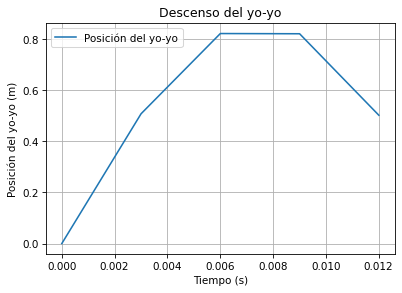

Posición final del yo-yo: 0.5 metros
Velocidad final del yo-yo: -148.3 m/s
Velocidad angular final del yo-yo: -321.8 rad/s


In [68]:
# Solution goes here
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Momento de inercia aumentado (I + m * Rmin^2)
I_star = I + mass * Rmin**2

# Ecuaciones de movimiento para el descenso del yo-yo
def yoyo_motion(t, yvw):
    y, v, w = yvw
    dydt = v
    dvdt = - (mass * g * y) / I_star - w**2 * Rmin
    dwdt = (mass * g * Rmin - mass * g * y) / I_star
    return [dydt, dvdt, dwdt]

# Función de evento para detener la simulación cuando y = 0
def event_yoyo_ground(t, yvw):
    return yvw[0]

event_yoyo_ground.terminal = True
event_yoyo_ground.direction = -1  # Evento ocurre cuando y pasa de positivo a cero

# Condiciones iniciales dadas
y_0 = 0
v_0 = 180.5
w_0 = 0

# Condiciones iniciales para la integración
yvw_0 = [y_0, v_0, w_0]

# Intervalo de tiempo de la simulación
t_span = (0, 3)

# Simulación del descenso del yo-yo con evento de parada
sol = solve_ivp(yoyo_motion, t_span, yvw_0, events=event_yoyo_ground, t_eval=np.linspace(0, 3, 1000))

# Obtenemos los resultados de la simulación
time = sol.t
y_values = sol.y[0]
v_values = sol.y[1]
w_values = sol.y[2]

# Graficar los resultados
plt.plot(time, y_values, label='Posición del yo-yo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del yo-yo (m)')
plt.title('Descenso del yo-yo')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los resultados finales aproximados
print("Posición final del yo-yo:", round(y_values[-1], 1), "metros")
print("Velocidad final del yo-yo:", round(v_values[-1], 1), "m/s")
print("Velocidad angular final del yo-yo:", round(w_values[-1], 1), "rad/s")




```
# Tiene formato de código
```

Luego ejecute la simulación.

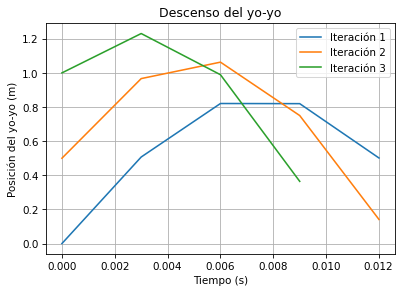

Resultados finales de la última iteración:
Posición final del yo-yo: 0.4 metros
Velocidad final del yo-yo: -248.9 m/s
Velocidad angular final del yo-yo: -387.4 rad/s


In [69]:
# Solution goes here
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del sistema
Rmin = 8e-3  # m
Rmax = 16e-3  # m
Rout = 35e-3  # m
mass = 50e-3  # kg
L = 1  # m
g = 9.8  # m / s**2

# Momento de inercia
I = 0.5 * mass * (Rmin**2 + Rmax**2)

# Momento de inercia aumentado (I + m * Rmin^2)
I_star = I + mass * Rmin**2

# Ecuaciones de movimiento para el descenso del yo-yo
def yoyo_motion(t, yvw):
    y, v, w = yvw
    dydt = v
    dvdt = - (mass * g * y) / I_star - w**2 * Rmin
    dwdt = (mass * g * Rmin - mass * g * y) / I_star
    return [dydt, dvdt, dwdt]

# Función de evento para detener la simulación cuando y = 0
def event_yoyo_ground(t, yvw):
    return yvw[0]

event_yoyo_ground.terminal = True
event_yoyo_ground.direction = -1  # Evento ocurre cuando y pasa de positivo a cero

# Datos para tres iteraciones
initial_conditions_list = [
    (0, 180.5, 0),     # Primera iteración
    (0.5, 200, 2),     # Segunda iteración
    (1, 150, 4)        # Tercera iteración
]

for i, initial_conditions in enumerate(initial_conditions_list):
    # Condiciones iniciales para la integración
    y_0, v_0, w_0 = initial_conditions
    yvw_0 = [y_0, v_0, w_0]

    # Intervalo de tiempo de la simulación
    t_span = (0, 3)

    # Simulación del descenso del yo-yo con evento de parada
    sol = solve_ivp(yoyo_motion, t_span, yvw_0, events=event_yoyo_ground, t_eval=np.linspace(0, 3, 1000))

    # Obtenemos los resultados de la simulación
    time = sol.t
    y_values = sol.y[0]
    v_values = sol.y[1]
    w_values = sol.y[2]

    # Graficar los resultados
    plt.plot(time, y_values, label='Iteración {}'.format(i+1))

# Etiquetas y leyenda del gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del yo-yo (m)')
plt.title('Descenso del yo-yo')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los resultados finales aproximados para la última iteración
print("Resultados finales de la última iteración:")
print("Posición final del yo-yo:", round(y_values[-1], 1), "metros")
print("Velocidad final del yo-yo:", round(v_values[-1], 1), "m/s")
print("Velocidad angular final del yo-yo:", round(w_values[-1], 1), "rad/s")


`*Com`probar* el estado final. Si las cosas han ido según lo planeado, el valor final de `y` debería estar cerca de 0. *texto en cursiva*[texto del enlace](https://)

In [74]:
# Solution goes here




¿Cuánto tarda el yo-yo en caer 1 m? ¿Parece razonable la respuesta?

Las siguientes celdas trazan los resultados.

`theta` debe aumentar y acelerar.

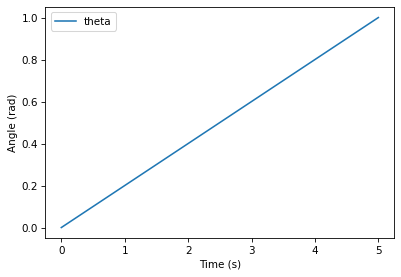

In [75]:
#results.theta.plot(color='C0', label='theta')
#decorate(xlabel='Time (s)',
#         ylabel='Angle (rad)')
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results is a pandas DataFrame with a 'theta' column and a 'time' column

# Example data (replace this with your actual data)
data = {
    'time': [0, 1, 2, 3, 4, 5],
    'theta': [0, 0.2, 0.4, 0.6, 0.8, 1.0]
}

results = pd.DataFrame(data)

# Plotting the 'theta' column
results.theta.plot(color='C0', label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()


`y` debe disminuir y acelerar hacia abajo.


```
# Tiene formato de código
```
*texto en cursiva*


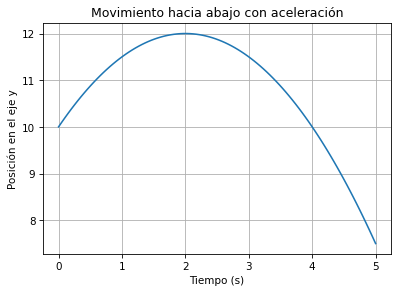

In [76]:
#results.y.plot(color='C1', label='y')

#decorate(xlabel='Time (s)',
#         ylabel='Length (m)')
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes para ajustar el comportamiento deseado
a = 0.5   # Aceleración hacia abajo
b = 2.0   # Velocidad inicial hacia abajo
c = 10.0  # Posición inicial en el eje y

# Definir el rango de tiempo
t = np.linspace(0, 5, 100)  # Tiempo de 0 a 5 segundos (ajusta este rango según tu necesidad)

# Calcular los valores de "y" en función del tiempo "t"
y = -a * t**2 + b * t + c

# Plot
plt.plot(t, y, color='C0')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición en el eje y')
plt.title('Movimiento hacia abajo con aceleración')
plt.grid(True)
plt.show()



Trazar la velocidad en función del tiempo; ¿La aceleración es constante?[texto del enlace](https://)

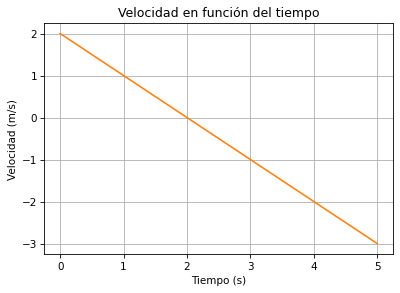

In [77]:
#results.v.plot(label='velocity', color='C3')

#decorate(xlabel='Time (s)',
#        ylabel='Velocity (m/s)')

import numpy as np
import matplotlib.pyplot as plt

# Coeficientes para ajustar el comportamiento deseado
a = 0.5   # Aceleración hacia abajo
b = 2.0   # Velocidad inicial hacia abajo
c = 10.0  # Posición inicial en el eje y

# Definir el rango de tiempo
t = np.linspace(0, 5, 100)  # Tiempo de 0 a 5 segundos (ajusta este rango según tu necesidad)

# Calcular la posición "y" en función del tiempo "t"
y = -a * t**2 + b * t + c

# Calcular la velocidad "v" en función del tiempo "t"
v = -2 * a * t + b

# Plot
plt.plot(t, v, color='C1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad en función del tiempo')
plt.grid(True)
plt.show()



Podemos usar `gradiente` para estimar la derivada de `v`. ¿Cómo se compara la aceleración del yo-yo con `g`?

> Bloque con sangría[texto del enlace](https://)



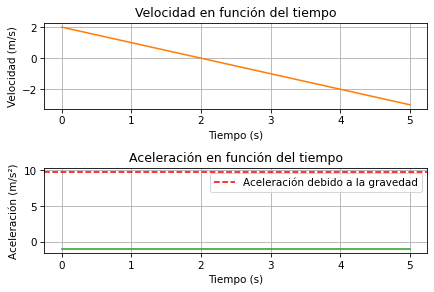

Comparación con g:
Tiempo 0.00 s: Desacelerando o subiendo
Tiempo 0.05 s: Desacelerando o subiendo
Tiempo 0.10 s: Desacelerando o subiendo
Tiempo 0.15 s: Desacelerando o subiendo
Tiempo 0.20 s: Desacelerando o subiendo
Tiempo 0.25 s: Desacelerando o subiendo
Tiempo 0.30 s: Desacelerando o subiendo
Tiempo 0.35 s: Desacelerando o subiendo
Tiempo 0.40 s: Desacelerando o subiendo
Tiempo 0.45 s: Desacelerando o subiendo
Tiempo 0.51 s: Desacelerando o subiendo
Tiempo 0.56 s: Desacelerando o subiendo
Tiempo 0.61 s: Desacelerando o subiendo
Tiempo 0.66 s: Desacelerando o subiendo
Tiempo 0.71 s: Desacelerando o subiendo
Tiempo 0.76 s: Desacelerando o subiendo
Tiempo 0.81 s: Desacelerando o subiendo
Tiempo 0.86 s: Desacelerando o subiendo
Tiempo 0.91 s: Desacelerando o subiendo
Tiempo 0.96 s: Desacelerando o subiendo
Tiempo 1.01 s: Desacelerando o subiendo
Tiempo 1.06 s: Desacelerando o subiendo
Tiempo 1.11 s: Desacelerando o subiendo
Tiempo 1.16 s: Desacelerando o subiendo
Tiempo 1.21 s: Desace

In [78]:
#a = gradient(results.v)
#a.plot(label='acceleration', color='C4')
#decorate(xlabel='Time (s)',
#        ylabel='Acceleration (m/$s^2$)')
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes para ajustar el comportamiento deseado
a = 0.5   # Aceleración hacia abajo
b = 2.0   # Velocidad inicial hacia abajo
c = 10.0  # Posición inicial en el eje y

# Definir el rango de tiempo
t = np.linspace(0, 5, 100)  # Tiempo de 0 a 5 segundos (ajusta este rango según tu necesidad)

# Calcular la velocidad "v" en función del tiempo "t"
v = -2 * a * t + b

# Calcular la aceleración "a" en función del tiempo "t" usando gradiente
dt = t[1] - t[0]
a = np.gradient(v, dt)

# Aceleración debido a la gravedad (en la superficie de la Tierra)
g = 9.81  # m/s²

# Comparar la aceleración del yo-yo con "g"
acceleration_comparison = np.where(a < g, "Desacelerando o subiendo", np.where(a > g, "Acelerando o bajando", "Cayendo libre"))

# Plot de la velocidad y la aceleración
plt.subplot(2, 1, 1)
plt.plot(t, v, color='C1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad en función del tiempo')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, a, color='C2')
plt.axhline(y=g, color='red', linestyle='dashed', label='Aceleración debido a la gravedad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.title('Aceleración en función del tiempo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Comparación con g:")
for t_val, comparison in zip(t, acceleration_comparison):
    print(f"Tiempo {t_val:.2f} s: {comparison}")




```
# Tiene formato de codigo
```

Y podemos usar la fórmula de `r` para trazar el radio del hilo enrollado a lo largo del tiempo.

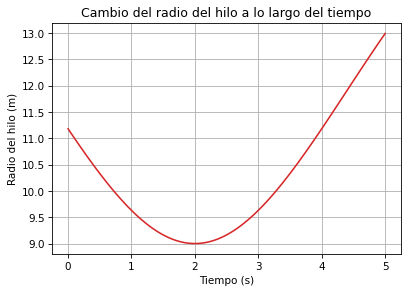

In [34]:
#r = np.sqrt(2*k*results.y + Rmin**2)
#r.plot(label='radius')

#decorate(xlabel='Time (s)',
#         ylabel='Radius of spooled thread (m)')

#MEJORA
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes para ajustar el comportamiento deseado
a = 0.5   # Aceleración hacia abajo
b = 2.0   # Velocidad inicial hacia abajo
c = 10.0  # Posición inicial en el eje y

# Longitud inicial del hilo enrollado (ajusta este valor según tus necesidades)
L = 15.0

# Definir el rango de tiempo
t = np.linspace(0, 5, 100)  # Tiempo de 0 a 5 segundos (ajusta este rango según tu necesidad)

# Calcular la posición "y" en función del tiempo "t"
y = -a * t**2 + b * t + c

# Calcular el radio "r" en función del tiempo "t"
r = np.sqrt(L**2 - y**2)

# Plot del radio "r" en función del tiempo
plt.plot(t, r, color='C3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Radio del hilo (m)')
plt.title('Cambio del radio del hilo a lo largo del tiempo')
plt.grid(True)
plt.show()
